In [115]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import os 
import sys
import cv2

In [116]:
import open3d_tutorial as o3dtut

In [117]:
o3dtut.interactive = not "CI" in os.environ

In [118]:
# sys.path.append(r'Open3D-master\examples\python')

In [119]:
# img2 = cv2.imread('depthImg2.png')
# img2.shape

In [120]:
# img1 = cv2.imread(r'depthImg2.png')
# img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
# img1 = cv2.resize(img1,(640,480))
# cv2.imwrite('depthImg2.png',img1)

In [121]:
# img1 = cv2.imread(r'colorImg.jpg')
# img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
# img1 = cv2.resize(img1,(640,480))
# cv2.imwrite('colorImg.jpg',img1)

In [122]:
color_raw = o3d.io.read_image('Media\colorImg3.jpg')
depth_raw = o3d.io.read_image('Media\depthImg3.png')
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw,depth_raw)
print(rgbd_image)

RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


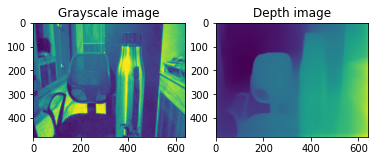

In [123]:
# Plot the images
plt.subplot(1, 2, 1)
plt.title('Grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('Depth image')
plt.imshow(rgbd_image.depth)
plt.show()

In [124]:
# Camera intrinsic parameters built into Open3D for Prime Sense
camera_intrinsic = o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault)

In [125]:
print(camera_intrinsic)

PinholeCameraIntrinsic with width = 640 and height = 480.
Access intrinsics with intrinsic_matrix.


In [126]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image, camera_intrinsic)

In [127]:
print(pcd)

PointCloud with 306901 points.


In [128]:
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 
